<a href="https://colab.research.google.com/github/Dataniel31/SIC-SAMSUNG-FINAL/blob/main/SIC_SAMSUNG_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Documentación del Proyecto: Clasificación de Neumonía en Radiografías

## Descripción del Proyecto

Este proyecto tiene como objetivo clasificar radiografías de tórax en dos categorías: **NORMAL** y **PNEUMONIA**. Utiliza un modelo de aprendizaje profundo para detectar la presencia de neumonía en imágenes médicas, lo que puede ser útil para la detección temprana y el diagnóstico.

## Datos

Los datos se obtuvieron de la competencia de Kaggle "Pediatric Chest X-Ray Pneumonia Classification". El conjunto de datos contiene imágenes de radiografías de tórax, donde cada imagen está etiquetada como normal o con neumonía.

### Estructura del Conjunto de Datos

El conjunto de datos está organizado en las siguientes carpetas:



In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dataniel31","key":"288ab18a13221d20fe8e7cd3906ca698"}'}

In [ ]:
# Crea el directorio de Kaggle
os.makedirs('/root/.kaggle', exist_ok=True)

!cp kaggle.json /root/.kaggle/


!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c sci-pediatric-chest-x-ray-pneumonia-classificatio
!unzip sci-pediatric-chest-x-ray-pneumonia-classificatio.zip


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: test/test/3253.jpeg     
  inflating: test/test/3261.jpeg     
  inflating: test/test/3264.jpeg     
  inflating: test/test/3265.jpeg     
  inflating: test/test/3266.jpeg     
  inflating: test/test/3272.jpeg     
  inflating: test/test/3273.jpeg     
  inflating: test/test/3275.jpeg     
  inflating: test/test/3277.jpeg     
  inflating: test/test/3279.jpeg     
  inflating: test/test/3281.jpeg     
  inflating: test/test/3288.jpeg     
  inflating: test/test/3289.jpeg     
  inflating: test/test/3290.jpeg     
  inflating: test/test/3297.jpeg     
  inflating: test/test/3298.jpeg     
  inflating: test/test/3299.jpeg     
  inflating: test/test/3300.jpeg     
  inflating: test/test/3303.jpeg     
  inflating: test/test/3306.jpeg     
  inflating: test/test/331.jpeg      
  inflating: test/test/3310.jpeg     
  inflating: test/test/3313.jpeg     
  inflating: test/test/3317.jpeg     
  inflating: test/test/3319

## Listado de Imágenes en la Carpeta de Prueba

El siguiente código se utiliza para listar las imágenes en la carpeta de prueba de nuestro proyecto de clasificación de neumonía en radiografías. Esta parte es fundamental para asegurarnos de que las imágenes están correctamente organizadas y disponibles para su posterior procesamiento.


In [ ]:
import os

# Ruta a la carpeta de prueba
test_dir = '/content/test/test/'

# Listar las imágenes en la carpeta de prueba
test_images = os.listdir(test_dir)
print("Imágenes en la carpeta de prueba:", test_images)


Imágenes en la carpeta de prueba: ['3038.jpeg', '2661.jpeg', '1144.jpeg', '3993.jpeg', '4016.jpeg', '1248.jpeg', '2923.jpeg', '2047.jpeg', '5811.jpeg', '3383.jpeg', '4137.jpeg', '1908.jpeg', '5695.jpeg', '4956.jpeg', '2420.jpeg', '3440.jpeg', '5788.jpeg', '3026.jpeg', '3176.jpeg', '2012.jpeg', '1391.jpeg', '1781.jpeg', '1276.jpeg', '3753.jpeg', '5551.jpeg', '1870.jpeg', '4428.jpeg', '2593.jpeg', '1046.jpeg', '65.jpeg', '1526.jpeg', '1026.jpeg', '1495.jpeg', '3987.jpeg', '826.jpeg', '344.jpeg', '1004.jpeg', '1322.jpeg', '3017.jpeg', '4614.jpeg', '88.jpeg', '4521.jpeg', '898.jpeg', '1898.jpeg', '2039.jpeg', '1307.jpeg', '3989.jpeg', '407.jpeg', '5776.jpeg', '3234.jpeg', '3149.jpeg', '849.jpeg', '1685.jpeg', '5721.jpeg', '2472.jpeg', '750.jpeg', '3788.jpeg', '1603.jpeg', '1875.jpeg', '5280.jpeg', '1340.jpeg', '3931.jpeg', '3332.jpeg', '4026.jpeg', '877.jpeg', '3188.jpeg', '2735.jpeg', '2715.jpeg', '3279.jpeg', '5586.jpeg', '5547.jpeg', '5628.jpeg', '5819.jpeg', '538.jpeg', '3796.jpeg', '3

## Listado de Imágenes en la Carpeta de Entrenamiento

Este código se utiliza para listar las imágenes en las carpetas de entrenamiento que contienen radiografías normales y radiografías de neumonía. Es importante verificar que ambas clases de imágenes están correctamente organizadas para el entrenamiento del modelo.


In [ ]:
# Ruta a la carpeta de entrenamiento
train_dir = '/content/train/train/'

# Listar las subcarpetas
normal_dir = os.path.join(train_dir, 'NORMAL')
pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

normal_images = os.listdir(normal_dir)
pneumonia_images = os.listdir(pneumonia_dir)

print("Imágenes normales en la carpeta de entrenamiento:", normal_images)
print("Imágenes de neumonía en la carpeta de entrenamiento:", pneumonia_images)


Imágenes normales en la carpeta de entrenamiento: ['425.jpeg', '5252.jpeg', '815.jpeg', '16.jpeg', '1310.jpeg', '1214.jpeg', '5334.jpeg', '1320.jpeg', '1223.jpeg', '409.jpeg', '1182.jpeg', '1053.jpeg', '251.jpeg', '692.jpeg', '116.jpeg', '121.jpeg', '722.jpeg', '909.jpeg', '5305.jpeg', '139.jpeg', '256.jpeg', '529.jpeg', '5443.jpeg', '765.jpeg', '531.jpeg', '69.jpeg', '984.jpeg', '932.jpeg', '333.jpeg', '577.jpeg', '1132.jpeg', '1342.jpeg', '840.jpeg', '1336.jpeg', '1157.jpeg', '252.jpeg', '544.jpeg', '964.jpeg', '329.jpeg', '149.jpeg', '645.jpeg', '26.jpeg', '784.jpeg', '376.jpeg', '925.jpeg', '1114.jpeg', '5237.jpeg', '670.jpeg', '1280.jpeg', '354.jpeg', '887.jpeg', '25.jpeg', '45.jpeg', '5381.jpeg', '212.jpeg', '627.jpeg', '1288.jpeg', '1334.jpeg', '1068.jpeg', '451.jpeg', '1300.jpeg', '85.jpeg', '1329.jpeg', '1229.jpeg', '5346.jpeg', '934.jpeg', '1236.jpeg', '543.jpeg', '991.jpeg', '348.jpeg', '1032.jpeg', '5324.jpeg', '987.jpeg', '614.jpeg', '1168.jpeg', '870.jpeg', '1050.jpeg', '

## Visualización de una Imagen de la Carpeta de Prueba

Este fragmento de código se utiliza para cargar y mostrar una imagen desde la carpeta de prueba, empleando las bibliotecas `PIL` (Python Imaging Library) y `matplotlib`. Esta visualización es fundamental para comprobar que las imágenes del conjunto de datos de prueba se han cargado correctamente y para tener una idea visual de los datos que se están utilizando en el modelo.

### Descripción del Proceso

- **Importación de Bibliotecas**: Se importan las bibliotecas necesarias para manejar imágenes y visualizarlas.

- **Definición de la Ruta de la Imagen**: Se establece la ruta de la imagen que se desea cargar desde la carpeta de prueba.

- **Carga de la Imagen**: La imagen se abre utilizando la ruta definida, permitiendo su manipulación posterior.

- **Visualización de la Imagen**: La imagen se presenta en la salida, con los ejes desactivados para ofrecer una visualización más clara.

### Importancia

Este proceso de visualización es útil para revisar ejemplos de las imágenes en el conjunto de datos, lo que permite a los investigadores o desarrolladores tener una mejor comprensión de los datos que están utilizando para entrenar y evaluar el modelo.


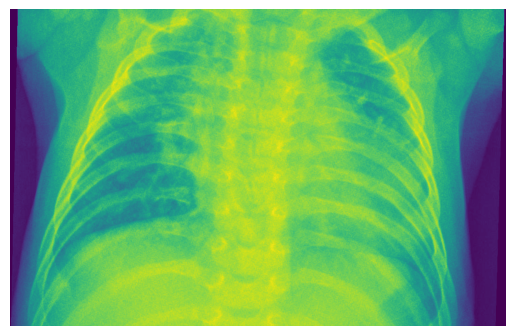

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Cargar y mostrar una imagen de la carpeta de prueba
image_path = os.path.join(test_dir, test_images[0])
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


## Generación de Imágenes para el Conjunto de Entrenamiento

Este fragmento de código utiliza la clase `ImageDataGenerator` de TensorFlow para realizar la generación de imágenes y la preparación del conjunto de datos de entrenamiento. Esto es esencial para el entrenamiento de modelos de aprendizaje automático, ya que permite la normalización y el manejo eficiente de grandes conjuntos de datos de imágenes.

### Descripción del Proceso

- **Importación de la Clase `ImageDataGenerator`**: Se importa la clase necesaria para crear generadores que facilitan la carga y preprocesamiento de imágenes.

- **Parámetros de Generación de Imágenes**:
  - Se inicializa el objeto `train_datagen` con el parámetro `rescale=1.0/255.0`, lo que normaliza los valores de píxeles de las imágenes entre 0 y 1. Esto es importante para mejorar la convergencia durante el entrenamiento.

- **Creación de Generadores de Datos**:
  - `train_generator` se define utilizando el método `flow_from_directory()`, que carga imágenes directamente desde la estructura de carpetas.
  - Se especifica la ruta al directorio de entrenamiento, el tamaño objetivo de las imágenes (150x150 píxeles), el tamaño del lote (32 imágenes por iteración), el modo de clasificación (binario) y las clases de las imágenes ('NORMAL' y 'PNEUMONIA').

- **Visualización de Clases Disponibles**:
  - Se imprime el diccionario de índices de clases, que muestra cómo se han asignado los números a cada clase. En este caso, 'NORMAL' corresponde a 0 y 'PNEUMONIA' a 1.

### Resultados

Al ejecutar este código, se encuentra que hay un total de 3816 imágenes en el conjunto de entrenamiento, y se confirman las clases disponibles con sus respectivas asignaciones:



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parámetros de generación de imágenes
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Crear generadores de datos
train_generator = train_datagen.flow_from_directory(
    os.path.join('/content/train', 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    classes=['NORMAL', 'PNEUMONIA']
)

# Ver las clases
print("Clases disponibles:", train_generator.class_indices)


Found 3816 images belonging to 2 classes.
Clases disponibles: {'NORMAL': 0, 'PNEUMONIA': 1}


## Definición y Compilación del Modelo de Red Neuronal

Este fragmento de código se utiliza para definir y compilar un modelo de red neuronal convolucional (CNN) utilizando la biblioteca Keras de TensorFlow. Este tipo de modelo es comúnmente utilizado para la clasificación de imágenes, como en el caso de la detección de neumonía en radiografías.

### Descripción del Proceso

- **Importación de Clases**:
  - Se importan las clases necesarias de Keras: `Sequential` para construir el modelo de manera secuencial, y las capas `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense` y `Dropout` que se utilizarán en el modelo.

- **Definición del Modelo**:
  - Se crea un objeto `model` como una instancia de `Sequential`, en el cual se apilan capas de diferentes tipos:
    - **Capa Convolucional**:
      - `Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))` define la primera capa convolucional con 32 filtros, un tamaño de núcleo de 3x3, y utiliza la función de activación ReLU. La `input_shape` especifica que las imágenes de entrada tendrán un tamaño de 150x150 píxeles y 3 canales de color (RGB).
    - **Capa de Agrupamiento**:
      - `MaxPooling2D(pool_size=(2, 2))` reduce la dimensionalidad de la salida de la capa convolucional, tomando el máximo de cada bloque de 2x2.
    - **Capa Convolucional Adicional**:
      - Se añaden capas convolucionales y de agrupamiento adicionales (64 y 128 filtros respectivamente) para extraer características más complejas de las imágenes.
    - **Aplanamiento**:
      - `Flatten()` convierte la salida de las capas anteriores en un vector unidimensional, preparando los datos para las capas densas.
    - **Capa Densa**:
      - `Dense(128, activation='relu')` agrega una capa densa con 128 neuronas y activación ReLU.
    - **Regularización**:
      - `Dropout(0.5)` se utiliza para reducir el sobreajuste, desconectando aleatoriamente el 50% de las neuronas durante el entrenamiento.
    - **Capa de Salida**:
      - `Dense(1, activation='sigmoid')` define la capa de salida con una neurona y una activación sigmoide, que es adecuada para la clasificación binaria.

- **Compilación del Modelo**:
  - `model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])` configura el modelo para el entrenamiento. Se utiliza el optimizador Adam, la función de pérdida de entropía cruzada binaria (adecuada para problemas de clasificación binaria), y se monitorea la precisión durante el entrenamiento.

### Importancia

Definir y compilar el modelo es un paso crucial en el desarrollo de modelos de aprendizaje profundo, ya que establece la arquitectura de la red y especifica cómo se optimizarán los parámetros durante el proceso de entrenamiento.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # Capa convolucional
    MaxPooling2D(pool_size=(2, 2)),  # Capa de agrupamiento
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),  # Aplanar la salida
    Dense(128, activation='relu'),  # Capa densa
    Dropout(0.5),  # Regularización
    Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Entrenamiento del Modelo

Este fragmento de código se utiliza para entrenar el modelo de red neuronal previamente definido utilizando el conjunto de datos de entrenamiento. El entrenamiento es fundamental para que el modelo aprenda a clasificar las imágenes correctamente.

### Descripción del Proceso

- **Entrenamiento del Modelo**:
  - `history = model.fit(...)` inicia el proceso de entrenamiento.
  - Se especifica el generador de datos de entrenamiento (`train_generator`) para proporcionar las imágenes al modelo en lotes.
  - `steps_per_epoch=train_generator.samples // train_generator.batch_size` calcula el número de pasos necesarios por época, dividiendo el número total de muestras por el tamaño del lote.
  - Se define el número de épocas (`epochs=10`), que determina cuántas veces el modelo verá todo el conjunto de entrenamiento durante el proceso de ajuste.

### Resultados del Entrenamiento

Durante el entrenamiento, se muestran los resultados de cada época, que incluyen la pérdida y la precisión del modelo. A continuación se presentan los resultados de las 10 épocas:



In [ ]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
)


Epoch 1/10
119/119 [==============================] - 34s 279ms/step - loss: 0.3996 - accuracy: 0.8140
Epoch 2/10
119/119 [==============================] - 33s 277ms/step - loss: 0.2043 - accuracy: 0.9244
Epoch 3/10
119/119 [==============================] - 33s 273ms/step - loss: 0.1764 - accuracy: 0.9374
Epoch 4/10
119/119 [==============================] - 33s 280ms/step - loss: 0.1614 - accuracy: 0.9453
Epoch 5/10
119/119 [==============================] - 34s 281ms/step - loss: 0.1468 - accuracy: 0.9474
Epoch 6/10
119/119 [==============================] - 33s 279ms/step - loss: 0.1203 - accuracy: 0.9551
Epoch 7/10
119/119 [==============================] - 33s 280ms/step - loss: 0.1171 - accuracy: 0.9553
Epoch 8/10
119/119 [==============================] - 33s 278ms/step - loss: 0.0950 - accuracy: 0.9659
Epoch 9/10
119/119 [==============================] - 32s 271ms/step - loss: 0.0935 - accuracy: 0.9654
Epoch 10/10
119/119 [==============================] - 33s 280ms/step - l


### Interpretación de los Resultados

- **Pérdida**: La pérdida disminuye progresivamente con cada época, lo que indica que el modelo está aprendiendo a clasificar las imágenes correctamente.
- **Precisión**: La precisión del modelo aumenta a lo largo de las épocas, comenzando desde 81.40% en la primera época y alcanzando 96.35% al final del entrenamiento. Esto sugiere que el modelo se está ajustando bien a los datos de entrenamiento.

### Importancia

El proceso de entrenamiento es crucial para optimizar el rendimiento del modelo. Un entrenamiento efectivo con una buena precisión y una baja pérdida sugiere que el modelo es capaz de generalizar bien a nuevas imágenes que no ha visto antes.


## Generación de Archivo de Envío

Este fragmento de código se encarga de cargar las imágenes del conjunto de prueba, realizar predicciones utilizando el modelo entrenado y crear un archivo CSV que se ajusta al formato requerido para la presentación.

### Descripción del Proceso

1. **Importaciones**:
   - Se importan las bibliotecas necesarias: `os`, `numpy`, `pandas` y `keras.preprocessing.image`.

2. **Definición de la Ruta**:
   - Se establece la ruta a la carpeta que contiene las imágenes de prueba (`test_images_path`).

3. **Listas para Almacenar Resultados**:
   - Se crean dos listas: `file_names` para almacenar los nombres de archivo (IDs) y `probabilities` para almacenar las probabilidades de predicción.

4. **Carga y Predicción de Imágenes**:
   - Se itera sobre cada imagen en la carpeta de prueba:
     - Se carga la imagen y se redimensiona a 150x150 píxeles.
     - La imagen se convierte a un arreglo NumPy y se normaliza dividiendo por 255.0.
     - Se expanden las dimensiones del arreglo para que sea compatible con el modelo.
     - Se realiza la predicción utilizando el modelo, obteniendo la probabilidad de que la imagen corresponda a un caso de neumonía.
     - Se guarda la probabilidad predicha y el nombre del archivo (sin extensión) como ID.

5. **Creación del DataFrame**:
   - Se crea un `DataFrame` de pandas llamado `submission_df`, que contiene las columnas 'ID' y 'TARGET' con los nombres de archivo y las probabilidades predichas, respectivamente.

6. **Guardar y Descargar el Archivo CSV**:
   - Se guarda el `DataFrame` en un archivo CSV llamado 'submission.csv'.
   - Finalmente, se descarga el archivo CSV al entorno local utilizando `files.download()`.



In [ ]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing import image

# Ruta a la carpeta de imágenes de prueba
test_images_path = '/content/test/test'

# Crear listas para almacenar nombres de archivo y probabilidades
file_names = []
probabilities = []

# Cargar y predecir imágenes
for img_name in os.listdir(test_images_path):
    img_path = os.path.join(test_images_path, img_name)

    # Cargar y preprocesar la imagen
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Normalizar la imagen
    img_array = np.expand_dims(img_array, axis=0)  # Expandir dimensiones para el modelo

    # Realizar la predicción
    pred = model.predict(img_array)

    # Guardar la probabilidad predicha (probabilidad de neumonía)
    probabilities.append(pred[0][0])  # La probabilidad de que sea neumonía
    file_names.append(os.path.splitext(img_name)[0])  # Guardar el nombre del archivo sin extensión como ID

# Crear un DataFrame para las probabilidades
submission_df = pd.DataFrame({
    'ID': file_names,  # Usar los nombres de archivo como IDs
    'TARGET': probabilities
})

# Guardar como archivo CSV
submission_df.to_csv('submission.csv', index=False)
print("Archivo de envío guardado como 'submission.csv'")

# Descargar el archivo CSV
from google.colab import files
files.download('submission.csv')


1/1 [==============================] - 0s 33ms/step
Archivo de envío guardado como 'submission.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Puntaje de Kaggle



![Puntaje de Kaggle](https://i.postimg.cc/TPPy06Tn/KAGGLE-PUNTAJE.png)
